In [1]:
import numpy as np
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, Normalizer, RobustScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split

In [2]:
df_bp =[]
df_bp = pd.read_csv('C:/Users/Kuzmins/Documents/Jupiter/VKRfinal/X_bp.csv')
df_nup =[]
df_nup = pd.read_csv('C:/Users/Kuzmins/Documents/Jupiter/VKRfinal/X_nup.csv')

In [3]:
df = df_bp.merge(df_nup, left_on = 'Unnamed: 0', right_on = 'Unnamed: 0')
df

Unnamed: 0  Sootnoshenie_Matrix_napolnitel  Plotnost_kg/m3  \
0              0                        1.857143     2030.000000   
1              1                        1.857143     2030.000000   
2              2                        1.857143     2030.000000   
3              3                        1.857143     2030.000000   
4              4                        2.771331     2030.000000   
...          ...                             ...             ...   
1018        1018                        2.271346     1952.087902   
1019        1019                        3.444022     2050.089171   
1020        1020                        3.280604     1972.372865   
1021        1021                        3.705351     2066.799773   
1022        1022                        3.808020     1890.413468   

      Modul_Uprugosti_GPa  Kolichestvo_napolnitela_m%  \
0              738.736842                   30.000000   
1              738.736842                   50.000000   
2              738.736842                   49.900000   
3              738.736842                  129.000000   
4              753.000000                  111.860000   
...                   ...                         ...   
1018           912.855545                   86.992183   
1019           444.732634                  145.981978   
1020           416.836523                  110.533477   
1021           741.475517                  141.397963   
1022           417.316232                  129.183416   

      Soderjanie_epoxidnih_grupp_%_2  Temp_vspishki_C_2  \
0                          22.267857         100.000000   
1                          23.750000         284.615385   
2                          33.000000         284.615385   
3                          21.250000         300.000000   
4                          22.267857         284.615385   
...                              ...                ...   
1018                       20.123249         324.774576   
1019                       19.599769         254.215401   
1020                       23.957502         248.423047   
1021                       19.246945         275.779840   
1022                       27.474763         300.952708   

      Poverhnostnaia_plotnost_g/m2  Modul_uprugosti_pri_rastiajenii_GPa  \
0                       210.000000                            70.000000   
1                       210.000000                            70.000000   
2                       210.000000                            70.000000   
3                       210.000000                            70.000000   
4                       210.000000                            70.000000   
...                            ...                                  ...   
1018                    209.198700                            73.090961   
1019                    350.660830                            72.920827   
1020                    740.142791                            74.734344   
1021                    641.468152                            74.042708   
1022                    758.747882                            74.309704   

      Prochnost_pri_rastiajenii_Mpa  Potreblenie_smoli_g/m2  \
0                       3000.000000              220.000000   
1                       3000.000000              220.000000   
2                       3000.000000              220.000000   
3                       3000.000000              220.000000   
4                       3000.000000              220.000000   
...                             ...                     ...   
1018                    2387.292495              125.007669   
1019                    2360.392784              117.730099   
1020                    2662.906040              236.606764   
1021                    2071.715856              197.126067   
1022                    2856.328932              194.754342   

      Ugol_nashivki_grad  Shag_nashivki  Plotnost_nashivki  
0                      0       4.000000          57.000000  
1              

In [4]:
df.drop(['Unnamed: 0'], inplace=True, axis=1)
# Пропуски
df.isnull().values.any()

False

Sootnoshenie_Matrix_napolnitel


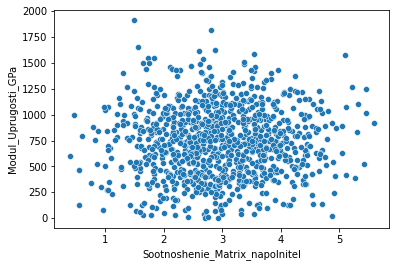

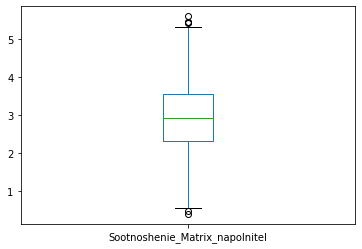




Plotnost_kg/m3


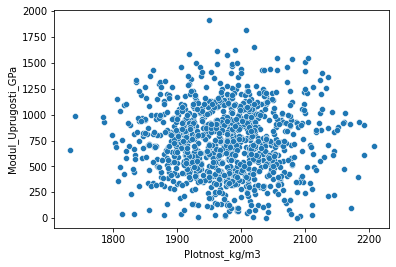

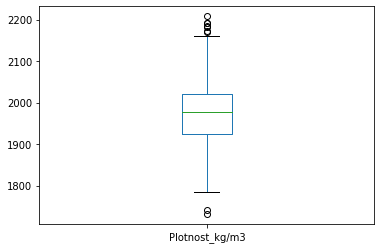




Modul_Uprugosti_GPa


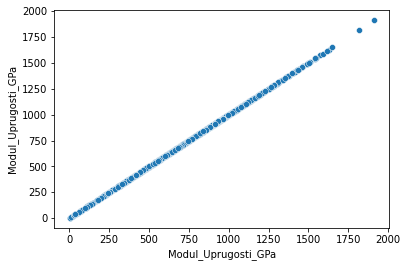

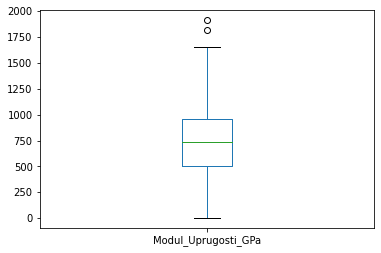




Kolichestvo_napolnitela_m%


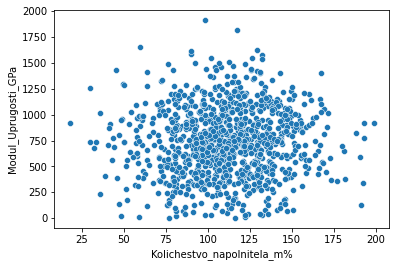

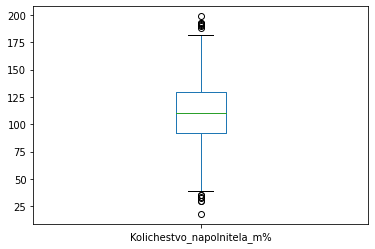




Soderjanie_epoxidnih_grupp_%_2


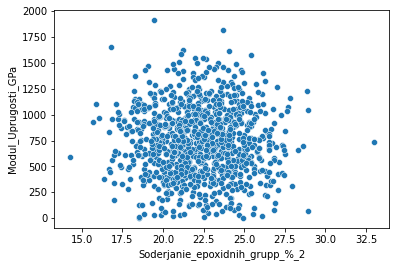

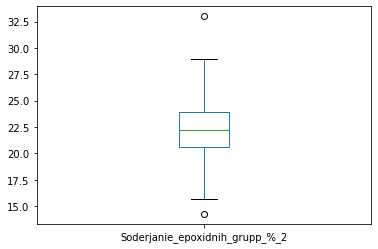




Temp_vspishki_C_2


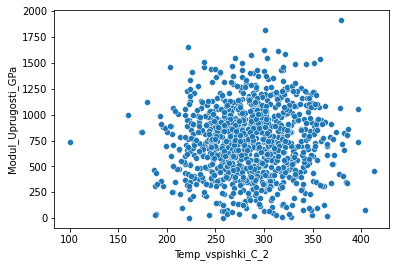

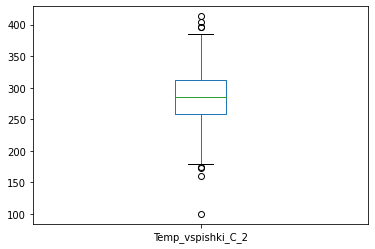




Poverhnostnaia_plotnost_g/m2


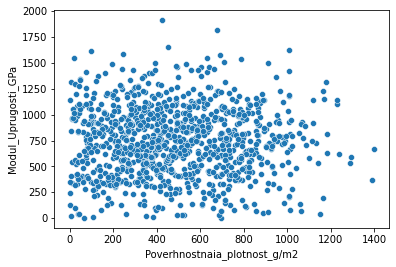

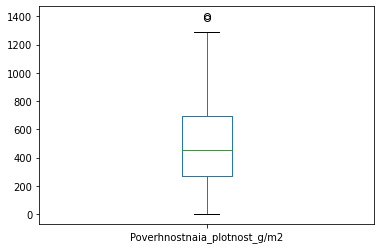




Modul_uprugosti_pri_rastiajenii_GPa


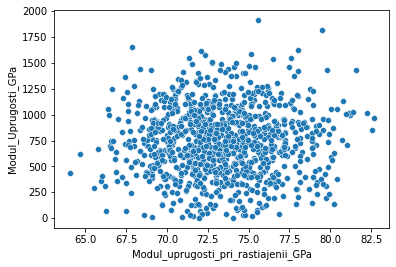

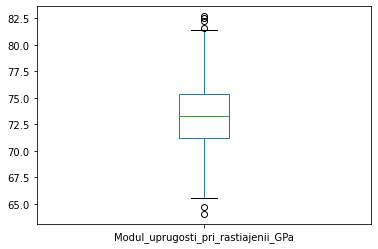




Prochnost_pri_rastiajenii_Mpa


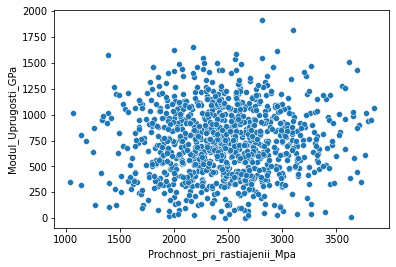

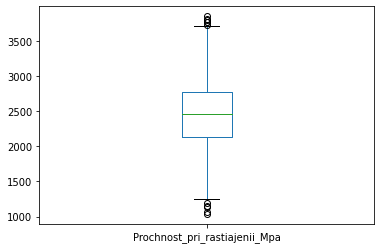




Potreblenie_smoli_g/m2


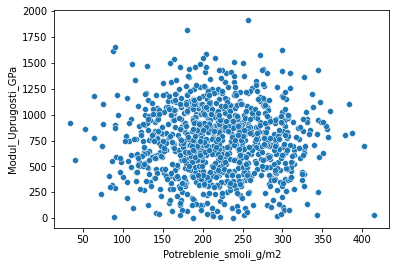

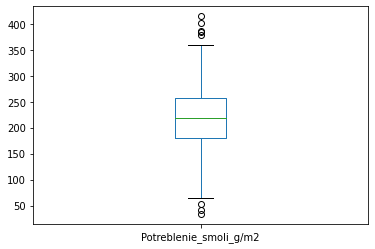




Ugol_nashivki_grad


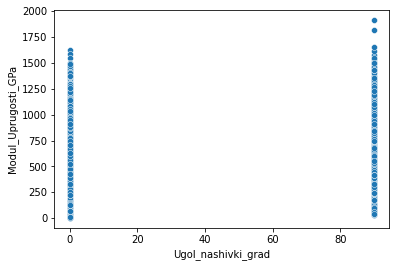

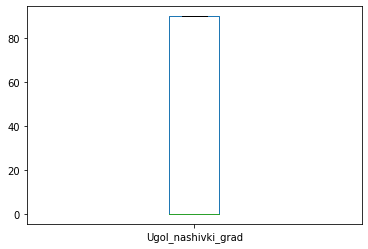




Shag_nashivki


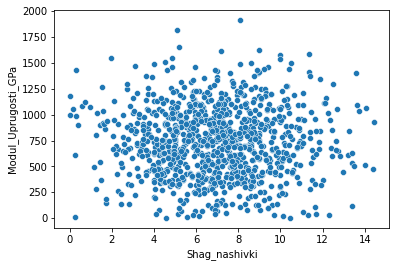

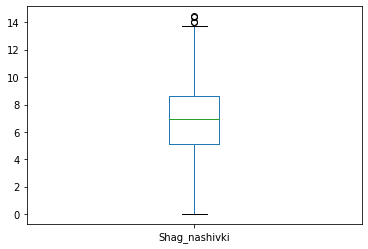




Plotnost_nashivki


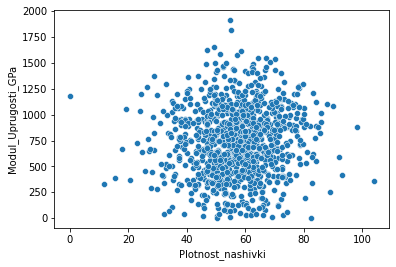

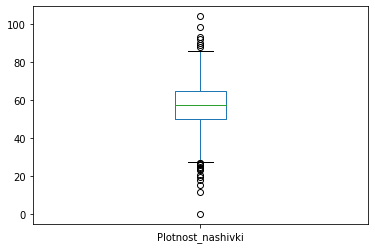

In [5]:
for column in df:
    print(column)
    sns.scatterplot(x = column , y = "Modul_Uprugosti_GPa", data = df);
    plt.show()
    df.boxplot(column = column, grid = False)
    plt.show()
    print('\n\n')
    

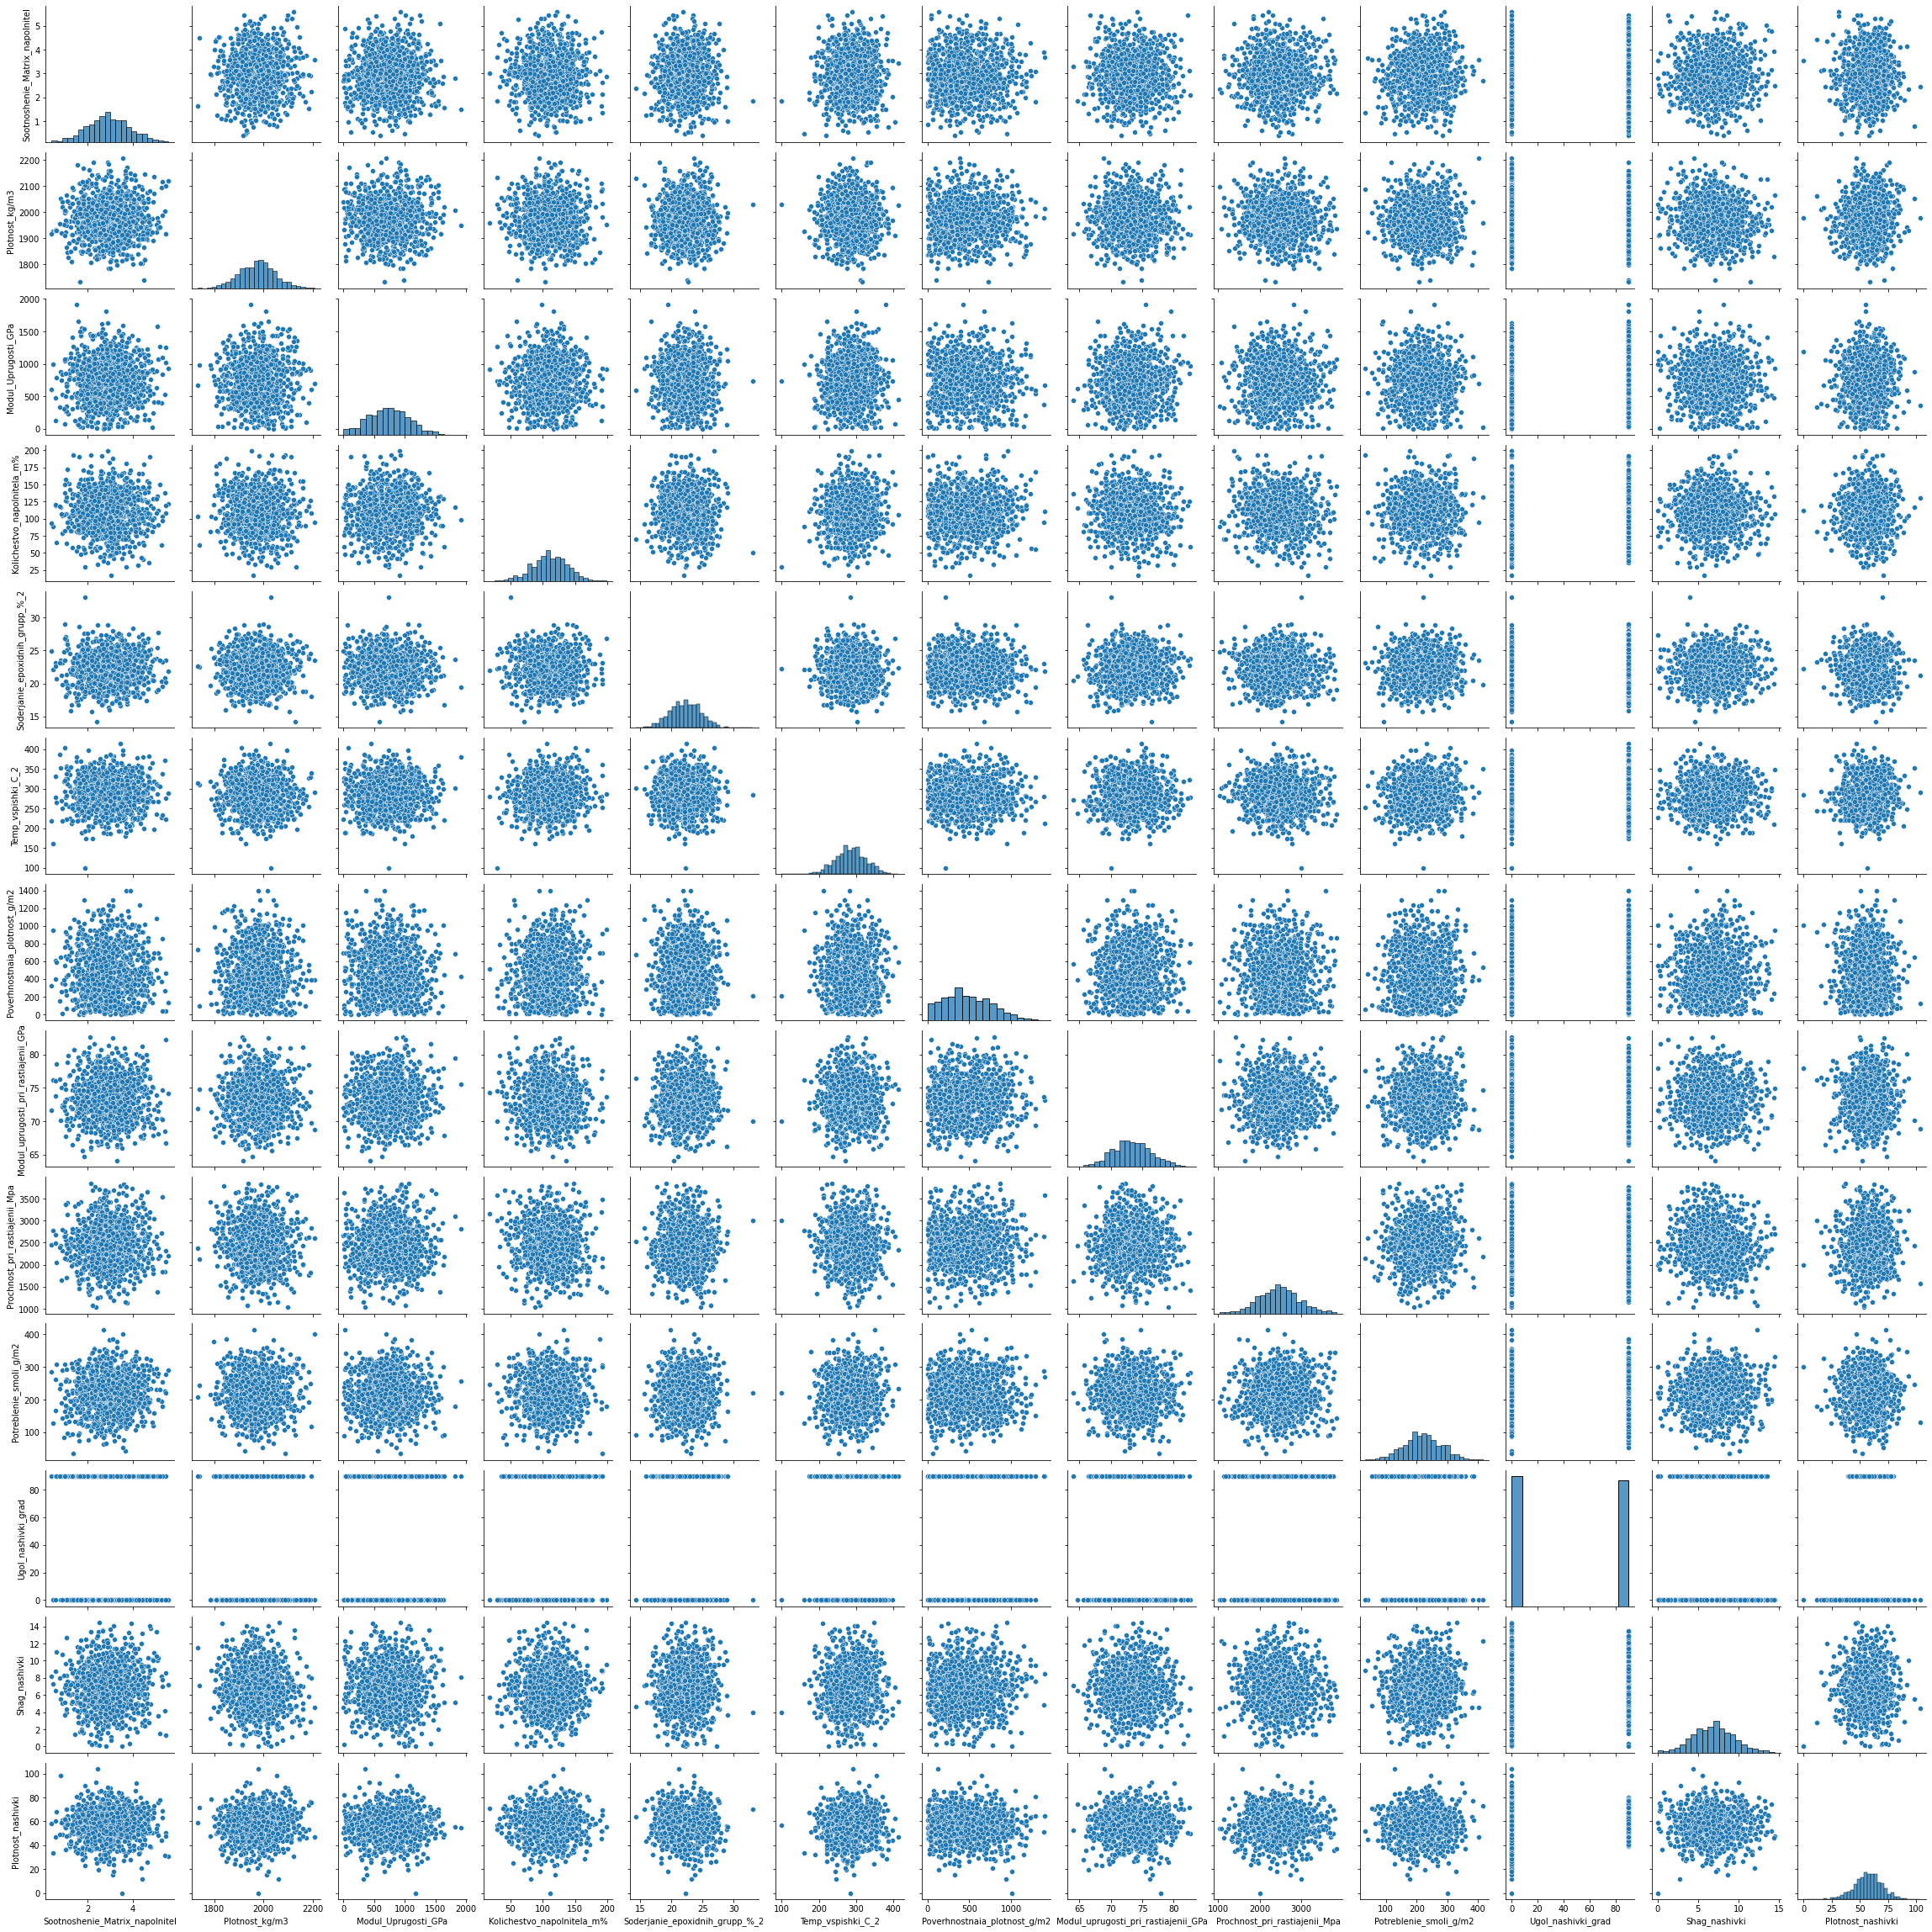

In [6]:
sns.pairplot(df)
plt.savefig('matrix1.png')

<AxesSubplot:>

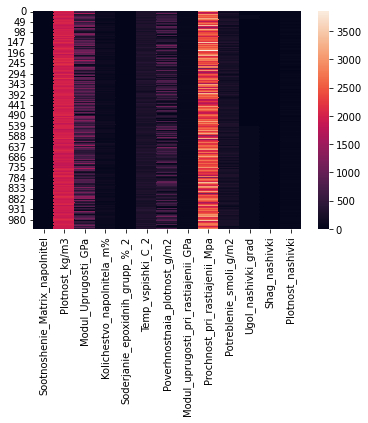

In [7]:
sns.heatmap(df)

In [8]:
df.describe()

Sootnoshenie_Matrix_napolnitel  Plotnost_kg/m3  Modul_Uprugosti_GPa  \
count                     1023.000000     1023.000000          1023.000000   
mean                         2.930366     1975.734888           739.923233   
std                          0.913222       73.729231           330.231581   
min                          0.389403     1731.764635             2.436909   
25%                          2.317887     1924.155466           500.047452   
50%                          2.906878     1977.621657           739.664328   
75%                          3.552660     2021.374374           961.812526   
max                          5.591742     2207.773481          1911.536477   

       Kolichestvo_napolnitela_m%  Soderjanie_epoxidnih_grupp_%_2  \
count                 1023.000000                     1023.000000   
mean                   110.570769                       22.244390   
std                     28.295911                        2.406301   
min                     17.740275                       14.254986   
25%                     92.443497                       20.608034   
50%                    110.564840                       22.230744   
75%                    129.730366                       23.961934   
max                    198.953207                       33.000000   

       Temp_vspishki_C_2  Poverhnostnaia_plotnost_g/m2  \
count        1023.000000                   1023.000000   
mean          285.882151                    482.731833   
std            40.943260                    281.314690   
min           100.000000                      0.603740   
25%           259.066528                    266.816645   
50%           285.896812                    451.864365   
75%           313.002105                    693.225017   
max           413.273418                   1399.542362   

       Modul_uprugosti_pri_rastiajenii_GPa  Prochnost_pri_rastiajenii_Mpa  \
count                          1023.000000                    1023.000000   
mean                             73.328571                    2466.922843   
std                               3.118983                     485.628006   
min                              64.054061                    1036.856605   
25%                              71.245018                    2135.850448   
50%                              73.268805                    2459.524526   
75%                              75.356612                    2767.193119   
max                              82.682051                    3848.436732   

       Potreblenie_smoli_g/m2  Ugol_nashivki_grad  Shag_nashivki  \
count             1023.000000         1023.000000    1023.000000   
mean               218.423144           44.252199       6.899222   
std                 59.735931           45.015793       2.563467   
min                 33.803026            0.000000       0.000000   
25%                179.627520            0.000000       5.080033   
50%                219.198882            0.000000       6.916144   
75%                257.481724           90.000000       8.586293   
max                414.590628           90.000000      14.440522   

       Plotnost_nashivki  
count        1023.000000  
mean           57.153929  
std            12.350969  
min             0.000000  
25%            49.799212  
50%            57.341920  
75%            64.944961  
max           103.988901

In [9]:
dfp = df.copy(deep = True)

In [10]:
#Remove outliers
for x in dfp:
    q75,q25 = np.percentile(dfp.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    dfp.loc[dfp[x] < min,x] = np.nan
    dfp.loc[dfp[x] > max,x] = np.nan
dfp.head()

Sootnoshenie_Matrix_napolnitel  Plotnost_kg/m3  Modul_Uprugosti_GPa  \
0                        1.857143          2030.0           738.736842   
1                        1.857143          2030.0           738.736842   
2                        1.857143          2030.0           738.736842   
3                        1.857143          2030.0           738.736842   
4                        2.771331          2030.0           753.000000   

   Kolichestvo_napolnitela_m%  Soderjanie_epoxidnih_grupp_%_2  \
0                         NaN                       22.267857   
1                       50.00                       23.750000   
2                       49.90                             NaN   
3                      129.00                       21.250000   
4                      111.86                       22.267857   

   Temp_vspishki_C_2  Poverhnostnaia_plotnost_g/m2  \
0                NaN                         210.0   
1         284.615385                         210.0   
2         284.615385                         210.0   
3         300.000000                         210.0   
4         284.615385                         210.0   

   Modul_uprugosti_pri_rastiajenii_GPa  Prochnost_pri_rastiajenii_Mpa  \
0                                 70.0                         3000.0   
1                                 70.0                         3000.0   
2                                 70.0                         3000.0   
3                                 70.0                         3000.0   
4                                 70.0                         3000.0   

   Potreblenie_smoli_g/m2  Ugol_nashivki_grad  Shag_nashivki  \
0                   220.0                 0.0            4.0   
1                   220.0                 0.0            4.0   
2                   220.0                 0.0            4.0   
3                   220.0                 0.0            5.0   
4                   220.0                 0.0            5.0   

   Plotnost_nashivki  
0               57.0  
1               60.0  
2               70.0  
3               47.0  
4               57.0

In [11]:
dfp.isnull().sum()

Sootnoshenie_Matrix_napolnitel          6
Plotnost_kg/m3                          9
Modul_Uprugosti_GPa                     2
Kolichestvo_napolnitela_m%             14
Soderjanie_epoxidnih_grupp_%_2          2
Temp_vspishki_C_2                       8
Poverhnostnaia_plotnost_g/m2            2
Modul_uprugosti_pri_rastiajenii_GPa     6
Prochnost_pri_rastiajenii_Mpa          11
Potreblenie_smoli_g/m2                  8
Ugol_nashivki_grad                      0
Shag_nashivki                           4
Plotnost_nashivki                      21
dtype: int64

In [12]:
#Так как количество незначительное, решаем удалить данные
dfp = dfp.dropna(axis = 0)
dfp

Sootnoshenie_Matrix_napolnitel  Plotnost_kg/m3  Modul_Uprugosti_GPa  \
1                           1.857143     2030.000000           738.736842   
3                           1.857143     2030.000000           738.736842   
4                           2.771331     2030.000000           753.000000   
5                           2.767918     2000.000000           748.000000   
6                           2.569620     1910.000000           807.000000   
...                              ...             ...                  ...   
1018                        2.271346     1952.087902           912.855545   
1019                        3.444022     2050.089171           444.732634   
1020                        3.280604     1972.372865           416.836523   
1021                        3.705351     2066.799773           741.475517   
1022                        3.808020     1890.413468           417.316232   

      Kolichestvo_napolnitela_m%  Soderjanie_epoxidnih_grupp_%_2  \
1                      50.000000                       23.750000   
3                     129.000000                       21.250000   
4                     111.860000                       22.267857   
5                     111.860000                       22.267857   
6                     111.860000                       22.267857   
...                          ...                             ...   
1018                   86.992183                       20.123249   
1019                  145.981978                       19.599769   
1020                  110.533477                       23.957502   
1021                  141.397963                       19.246945   
1022                  129.183416                       27.474763   

      Temp_vspishki_C_2  Poverhnostnaia_plotnost_g/m2  \
1            284.615385                    210.000000   
3            300.000000                    210.000000   
4            284.615385                    210.000000   
5            284.615385                    210.000000   
6            284.615385                    210.000000   
...                 ...                           ...   
1018         324.774576                    209.198700   
1019         254.215401                    350.660830   
1020         248.423047                    740.142791   
1021         275.779840                    641.468152   
1022         300.952708                    758.747882   

      Modul_uprugosti_pri_rastiajenii_GPa  Prochnost_pri_rastiajenii_Mpa  \
1                               70.000000                    3000.000000   
3                               70.000000                    3000.000000   
4                               70.000000                    3000.000000   
5                               70.000000                    3000.000000   
6                               70.000000                    3000.000000   
...                                   ...                            ...   
1018                            73.090961                    2387.292495   
1019                            72.920827                    2360.392784   
1020                            74.734344                    2662.906040   
1021                            74.042708                    2071.715856   
1022                            74.309704                    2856.328932   

      Potreblenie_smoli_g/m2  Ugol_nashivki_grad  Shag_nashivki  \
1                 220.000000                 0.0       4.000000   
3                 220.000000                 0.0       5.000000   
4                 220.000000                 0.0       5.000000   
5                 220.000000                 0.0       5.000000   
6                 220.000000                 0.0       5.000000   
...                      ...                 ...            ...   
1018              125.007669                90.0       9.076380   
1019              117.730099                90.0      10.565614   
1020              236.606764                90.0       4.161154

In [13]:
#Анализ данных без выбросов
dfp.describe()

Sootnoshenie_Matrix_napolnitel  Plotnost_kg/m3  Modul_Uprugosti_GPa  \
count                      936.000000      936.000000           936.000000   
mean                         2.925683     1974.040023           738.247627   
std                          0.893712       70.808120           328.708665   
min                          0.547391     1784.482245             2.436909   
25%                          2.321931     1923.443747           498.577158   
50%                          2.904731     1977.258043           738.736842   
75%                          3.546650     2020.158764           958.418993   
max                          5.314144     2161.565216          1649.415706   

       Kolichestvo_napolnitela_m%  Soderjanie_epoxidnih_grupp_%_2  \
count                  936.000000                      936.000000   
mean                   110.916216                       22.209030   
std                     27.037891                        2.394871   
min                     38.668500                       15.695894   
25%                     92.523816                       20.571516   
50%                    111.113175                       22.184713   
75%                    130.001450                       23.961818   
max                    181.828448                       28.955094   

       Temp_vspishki_C_2  Poverhnostnaia_plotnost_g/m2  \
count         936.000000                    936.000000   
mean          286.040414                    482.993901   
std            39.400677                    280.190377   
min           179.374391                      0.603740   
25%           259.184486                    266.004099   
50%           286.024118                    457.732246   
75%           312.991425                    695.900862   
max           386.067992                   1291.340115   

       Modul_uprugosti_pri_rastiajenii_GPa  Prochnost_pri_rastiajenii_Mpa  \
count                           936.000000                     936.000000   
mean                             73.305127                    2467.488822   
std                               3.037381                     463.838911   
min                              65.553336                    1250.392802   
25%                              71.248823                    2146.936034   
50%                              73.259230                    2457.959767   
75%                              75.310788                    2755.169485   
max                              81.417126                    3705.672523   

       Potreblenie_smoli_g/m2  Ugol_nashivki_grad  Shag_nashivki  \
count              936.000000          936.000000     936.000000   
mean               217.613374           46.057692       6.915585   
std                 57.827255           45.011619       2.509672   
min                 63.685698            0.000000       0.037639   
25%                179.489091            0.000000       5.134988   
50%                218.388715           90.000000       6.943337   
75%                256.396777           90.000000       8.591450   
max                359.052220           90.000000      13.732404   

       Plotnost_nashivki  
count         936.000000  
mean           57.451895  
std            11.239331  
min            27.272928  
25%            50.209656  
50%            57.584225  
75%            64.798211  
max            86.012427

Sootnoshenie_Matrix_napolnitel


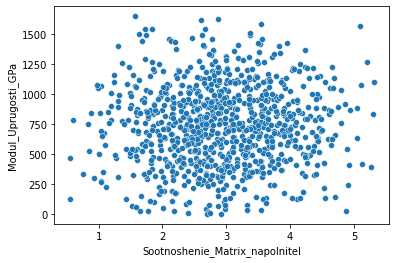

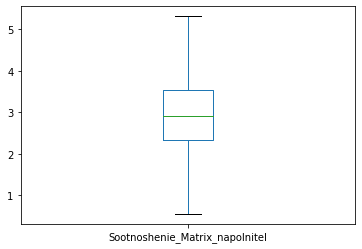




Plotnost_kg/m3


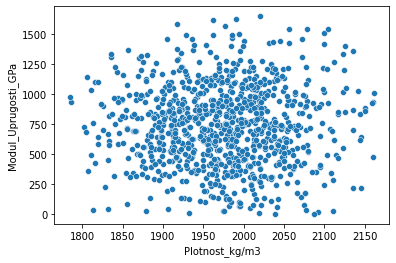

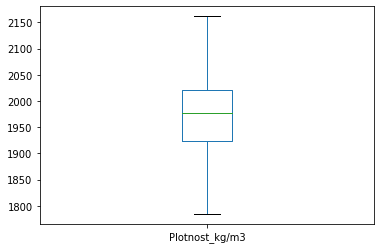




Modul_Uprugosti_GPa


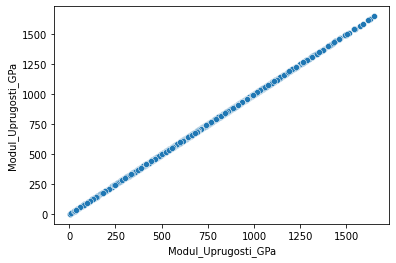

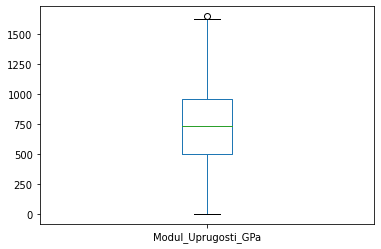




Kolichestvo_napolnitela_m%


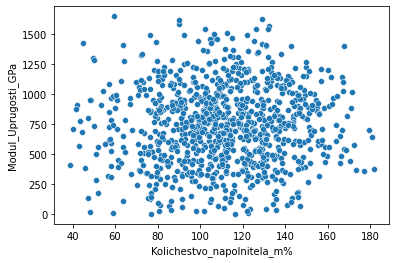

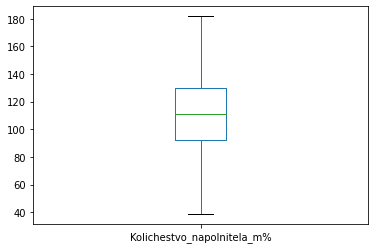




Soderjanie_epoxidnih_grupp_%_2


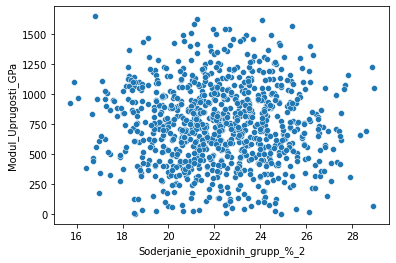

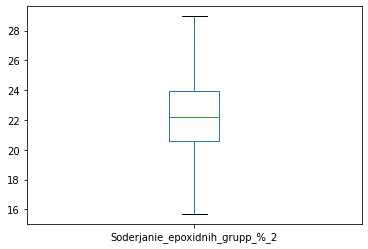




Temp_vspishki_C_2


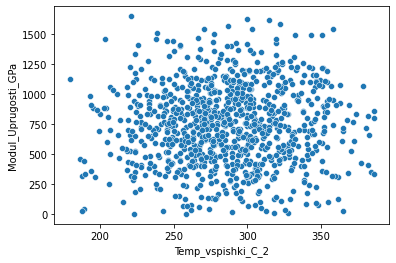

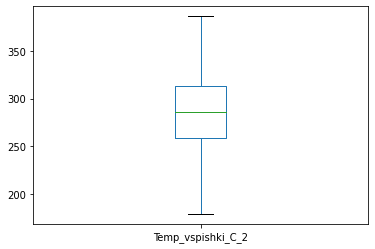




Poverhnostnaia_plotnost_g/m2


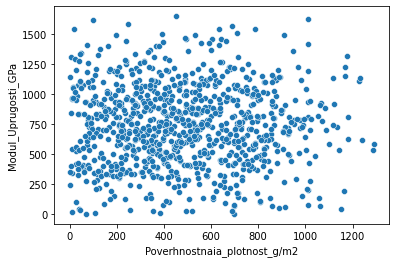

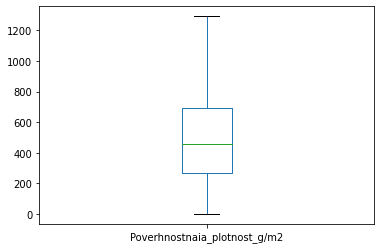




Modul_uprugosti_pri_rastiajenii_GPa


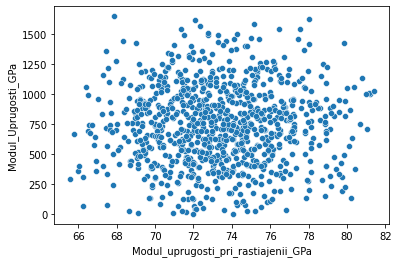

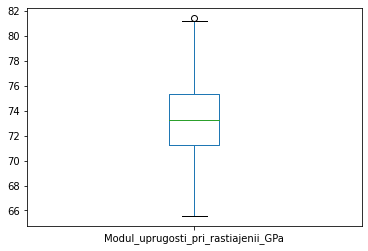




Prochnost_pri_rastiajenii_Mpa


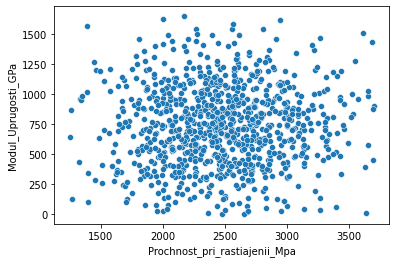

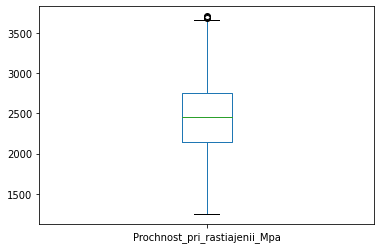




Potreblenie_smoli_g/m2


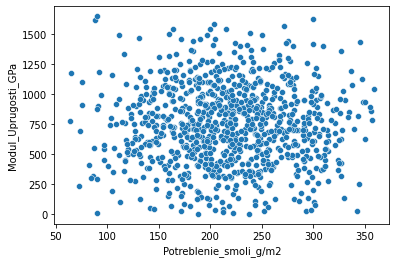

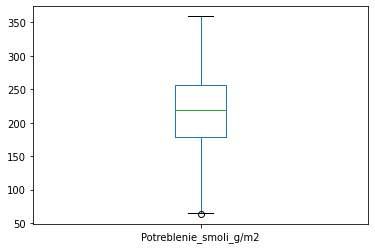




Ugol_nashivki_grad


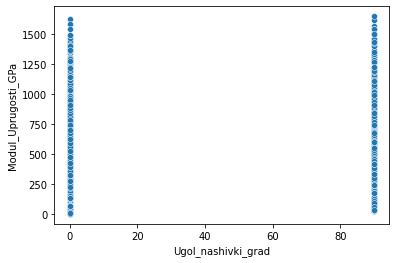

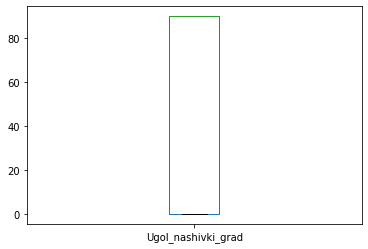




Shag_nashivki


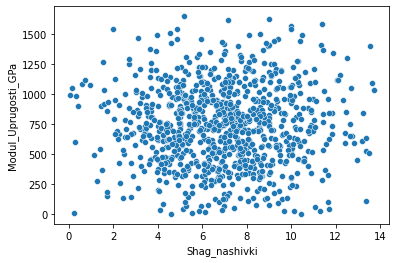

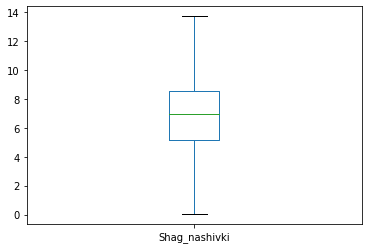




Plotnost_nashivki


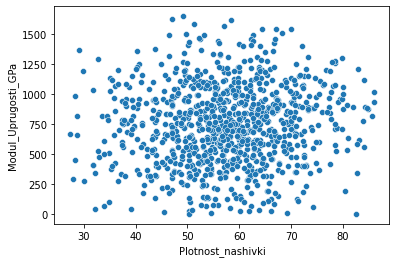

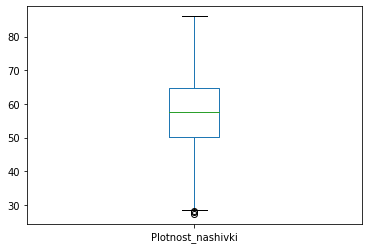

In [14]:
for column in dfp:
    print(column)
    sns.scatterplot(x = column , y = "Modul_Uprugosti_GPa", data = dfp);
    plt.show()
    dfp.boxplot(column = column, grid = False)
    plt.show()
    print('\n\n')

In [15]:
#Нормализация

scaler = Normalizer()
col = dfp.columns
processed = scaler.fit_transform(dfp)
dfpm = pd.DataFrame(processed, columns = col)
dfpm

Sootnoshenie_Matrix_napolnitel  Plotnost_kg/m3  Modul_Uprugosti_GPa  \
0                          0.000499        0.545436             0.198490   
1                          0.000499        0.545011             0.198335   
2                          0.000744        0.544829             0.202097   
3                          0.000746        0.539271             0.201687   
4                          0.000699        0.519919             0.219673   
..                              ...             ...                  ...   
931                        0.000700        0.601520             0.281289   
932                        0.001078        0.641541             0.139172   
933                        0.000953        0.572927             0.121081   
934                        0.001191        0.664389             0.238353   
935                        0.001071        0.531558             0.117343   

     Kolichestvo_napolnitela_m%  Soderjanie_epoxidnih_grupp_%_2  \
0                      0.013434                        0.006381   
1                      0.034634                        0.005705   
2                      0.030022                        0.005976   
3                      0.030161                        0.006004   
4                      0.030449                        0.006062   
..                          ...                             ...   
931                    0.026806                        0.006201   
932                    0.045683                        0.006133   
933                    0.032107                        0.006959   
934                    0.045454                        0.006187   
935                    0.036325                        0.007726   

     Temp_vspishki_C_2  Poverhnostnaia_plotnost_g/m2  \
0             0.076473                      0.056424   
1             0.080543                      0.056380   
2             0.076388                      0.056362   
3             0.076742                      0.056623   
4             0.077475                      0.057164   
..                 ...                           ...   
931           0.100077                      0.064463   
932           0.079552                      0.109733   
933           0.072161                      0.214994   
934           0.088652                      0.206205   
935           0.084624                      0.213349   

     Modul_uprugosti_pri_rastiajenii_GPa  Prochnost_pri_rastiajenii_Mpa  \
0                               0.018808                       0.806064   
1                               0.018793                       0.805435   
2                               0.018787                       0.805167   
3                               0.018874                       0.808906   
4                               0.019055                       0.816627   
..                                   ...                            ...   
931                             0.022522                       0.735625   
932                             0.022819                       0.738645   
933                             0.021709                       0.773510   
934                             0.023802                       0.665970   
935                             0.020895                       0.803159   

     Potreblenie_smoli_g/m2  Ugol_nashivki_grad  Shag_nashivki  \
0                  0.059111            0.000000       0.001075   
1                  0.059065            0.000000       0.001342   
2                  0.059046            0.000000       0.001342   
3                  0.059320            0.000000       0.001348   
4                  0.059886            0.000000       0.001361   
..                      ...                 ...            ...   
931                0.038520            0.027733       0.002797   
932                0.036842            0.028164       0.003306   
933                0.068729            0.026143       0.001209   
934                0.063368            0.028931      

In [16]:
dfpm.describe()

Sootnoshenie_Matrix_napolnitel  Plotnost_kg/m3  Modul_Uprugosti_GPa  \
count                      936.000000      936.000000           936.000000   
mean                         0.000883        0.596191             0.220344   
std                          0.000285        0.065372             0.095871   
min                          0.000163        0.442428             0.000709   
25%                          0.000681        0.551347             0.150786   
50%                          0.000870        0.591480             0.219921   
75%                          0.001067        0.640084             0.289727   
max                          0.001803        0.823683             0.524864   

       Kolichestvo_napolnitela_m%  Soderjanie_epoxidnih_grupp_%_2  \
count                  936.000000                      936.000000   
mean                     0.033543                        0.006710   
std                      0.009038                        0.001024   
min                      0.009669                        0.004113   
25%                      0.027556                        0.005972   
50%                      0.033470                        0.006646   
75%                      0.039519                        0.007347   
max                      0.062919                        0.010879   

       Temp_vspishki_C_2  Poverhnostnaia_plotnost_g/m2  \
count         936.000000                    936.000000   
mean            0.086399                      0.144900   
std             0.015058                      0.083867   
min             0.049402                      0.000230   
25%             0.075966                      0.080864   
50%             0.084929                      0.139799   
75%             0.096412                      0.203676   
max             0.147861                      0.414371   

       Modul_uprugosti_pri_rastiajenii_GPa  Prochnost_pri_rastiajenii_Mpa  \
count                           936.000000                     936.000000   
mean                              0.022144                       0.731325   
std                               0.002523                       0.069988   
min                               0.016105                       0.462927   
25%                               0.020394                       0.687823   
50%                               0.021957                       0.741083   
75%                               0.023751                       0.780799   
max                               0.030598                       0.877580   

       Potreblenie_smoli_g/m2  Ugol_nashivki_grad  Shag_nashivki  \
count              936.000000          936.000000     936.000000   
mean                 0.065667            0.013905       0.002094   
std                  0.018636            0.013753       0.000808   
min                  0.017538            0.000000       0.000011   
25%                  0.052244            0.000000       0.001530   
50%                  0.065375            0.021608       0.002048   
75%                  0.077676            0.027066       0.002628   
max                  0.122973            0.037721       0.004519   

       Plotnost_nashivki  
count         936.000000  
mean            0.017344  
std             0.003839  
min             0.007195  
25%             0.014769  
50%             0.017237  
75%             0.019722  
max             0.030905

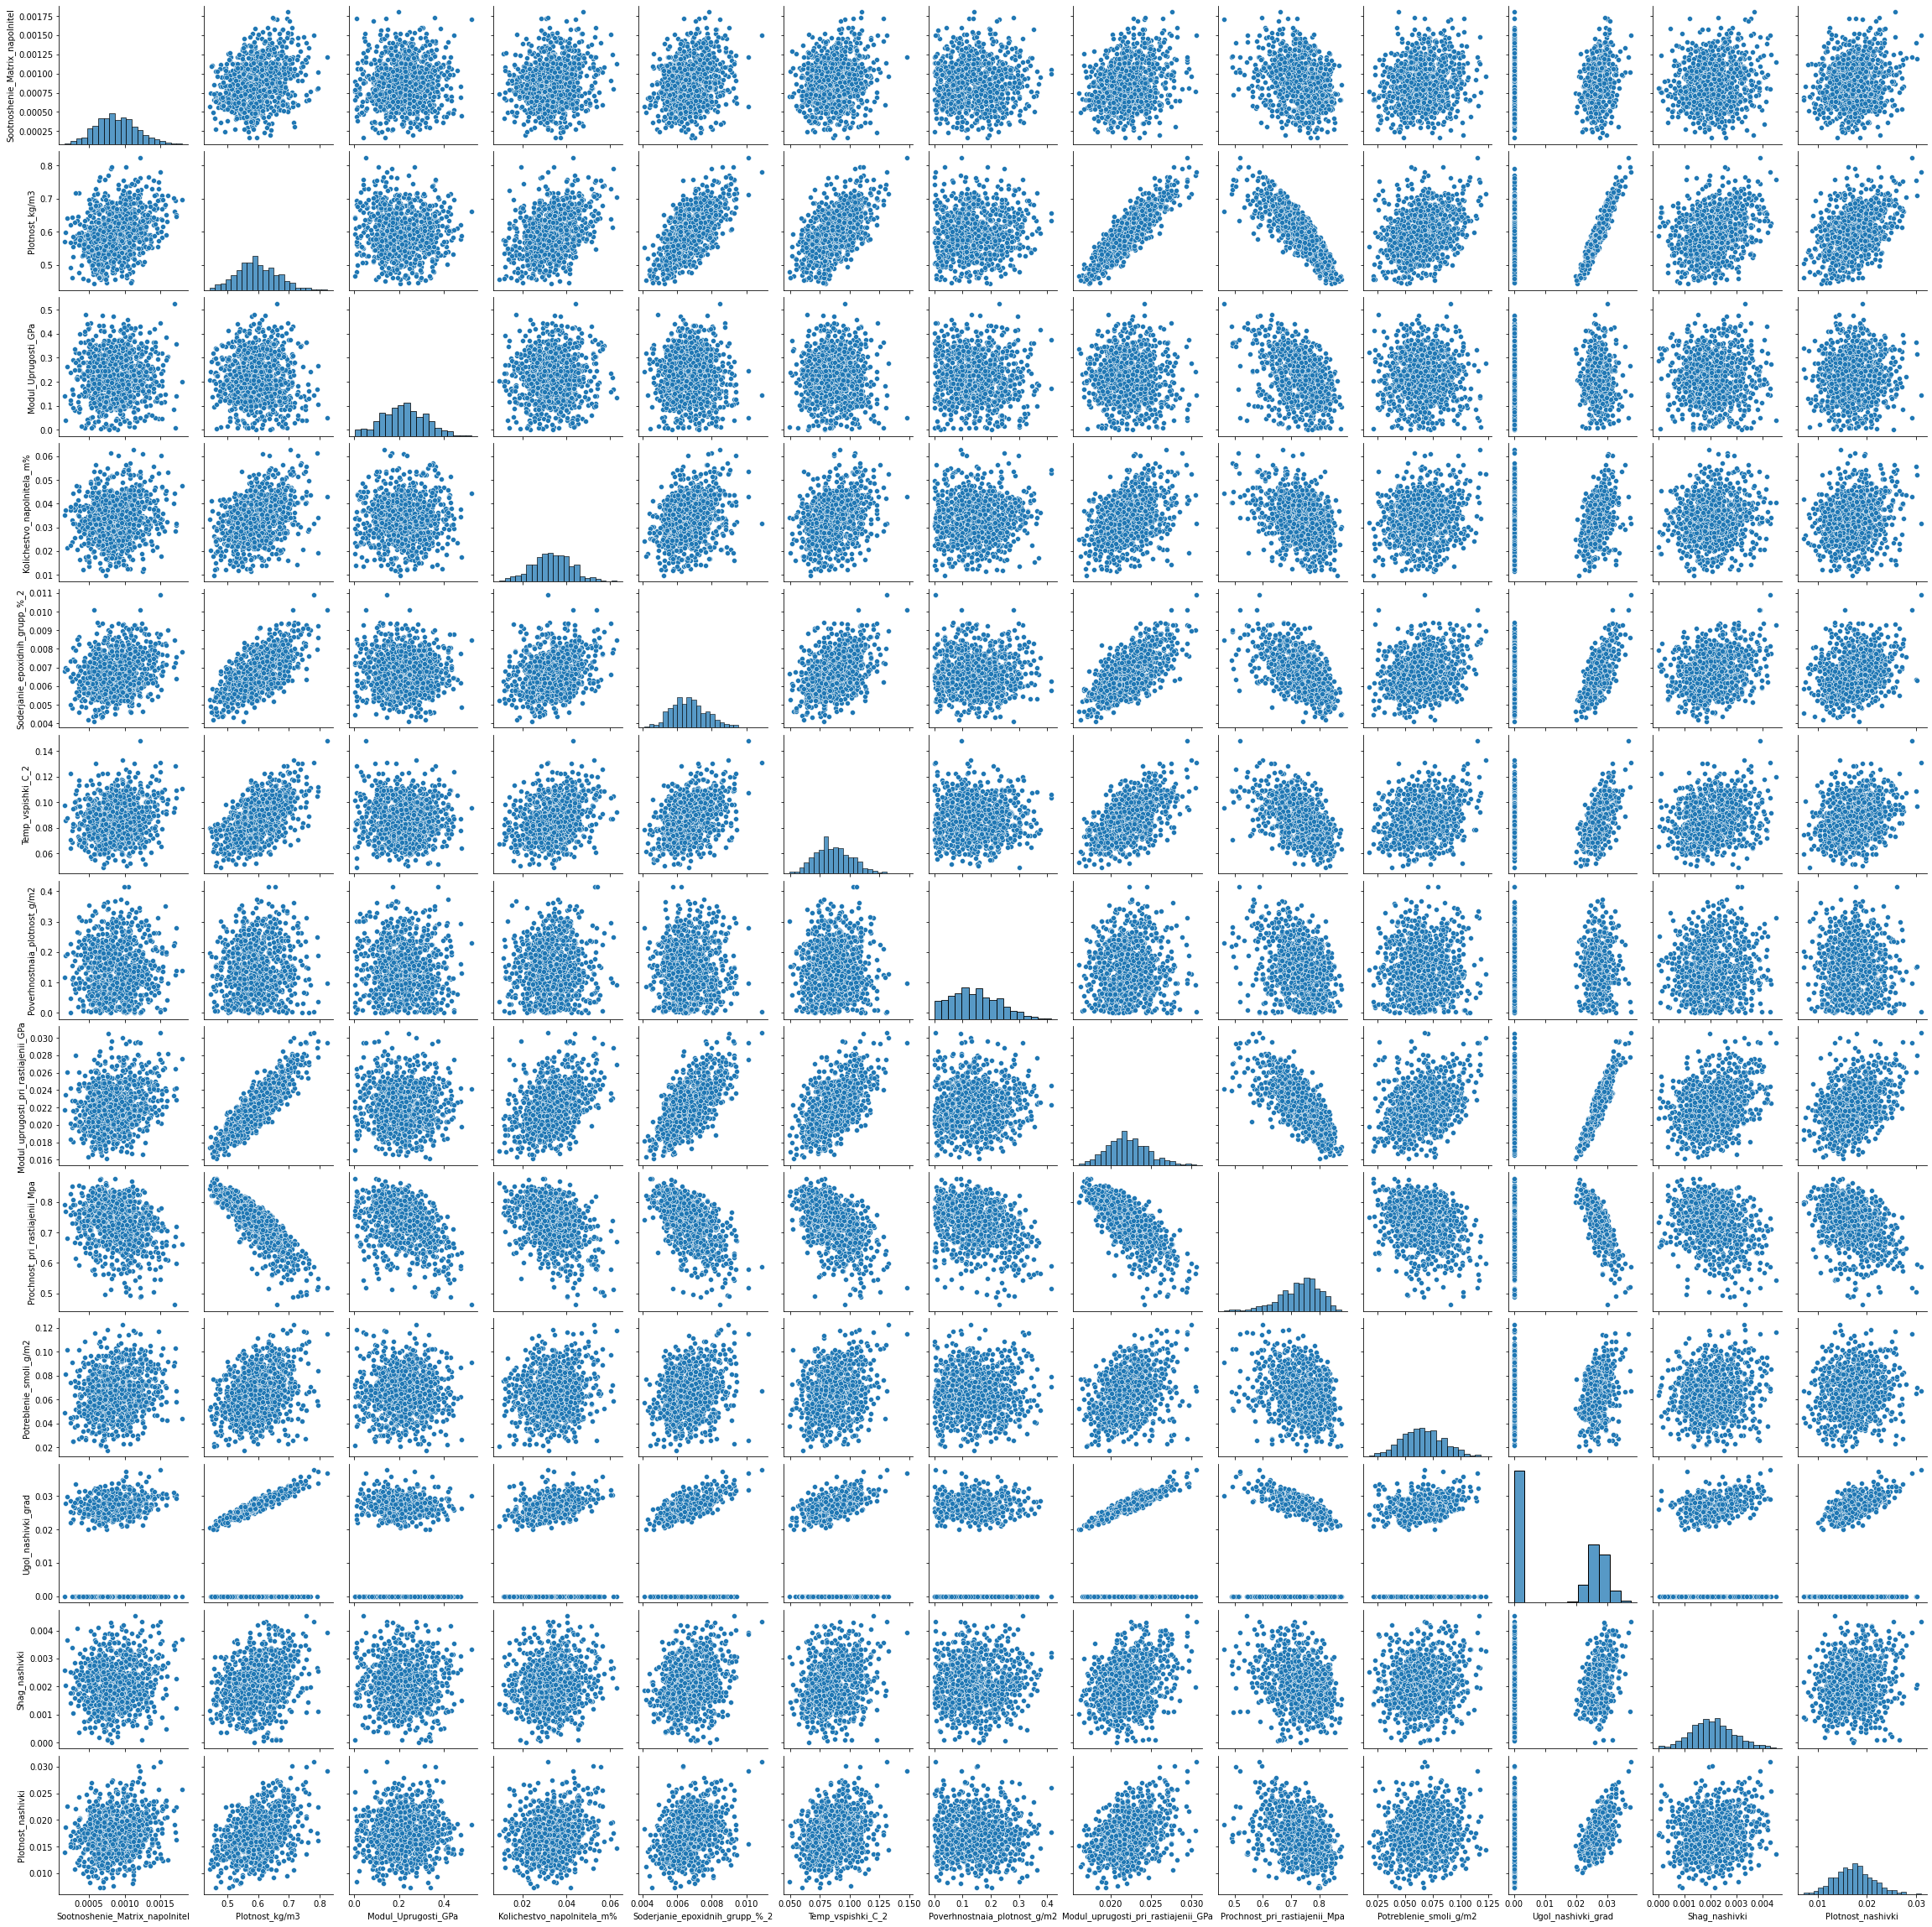

In [17]:
sns.pairplot(dfpm)
plt.savefig('matrix2.png')


In [18]:
dfpm.corr(method ='kendall')

Sootnoshenie_Matrix_napolnitel  \
Sootnoshenie_Matrix_napolnitel                             1.000000   
Plotnost_kg/m3                                             0.183061   
Modul_Uprugosti_GPa                                        0.013922   
Kolichestvo_napolnitela_m%                                 0.092714   
Soderjanie_epoxidnih_grupp_%_2                             0.138228   
Temp_vspishki_C_2                                          0.111175   
Poverhnostnaia_plotnost_g/m2                               0.014790   
Modul_uprugosti_pri_rastiajenii_GPa                        0.176713   
Prochnost_pri_rastiajenii_Mpa                             -0.162069   
Potreblenie_smoli_g/m2                                     0.094630   
Ugol_nashivki_grad                                         0.025826   
Shag_nashivki                                              0.087440   
Plotnost_nashivki                                          0.110512   

                                     Plotnost_kg/m3  Modul_Uprugosti_GPa  \
Sootnoshenie_Matrix_napolnitel             0.183061             0.013922   
Plotnost_kg/m3                             1.000000            -0.017323   
Modul_Uprugosti_GPa                       -0.017323             1.000000   
Kolichestvo_napolnitela_m%                 0.254194             0.024348   
Soderjanie_epoxidnih_grupp_%_2             0.450299            -0.019393   
Temp_vspishki_C_2                          0.381069             0.008931   
Poverhnostnaia_plotnost_g/m2               0.045359            -0.019242   
Modul_uprugosti_pri_rastiajenii_GPa        0.677248            -0.010270   
Prochnost_pri_rastiajenii_Mpa             -0.662366            -0.258627   
Potreblenie_smoli_g/m2                     0.197047            -0.005549   
Ugol_nashivki_grad                         0.213758            -0.023857   
Shag_nashivki                              0.196485             0.003899   
Plotnost_nashivki                          0.294981             0.036140   

                                     Kolichestvo_napolnitela_m%  \
Sootnoshenie_Matrix_napolnitel                         0.092714   
Plotnost_kg/m3                                         0.254194   
Modul_Uprugosti_GPa                                    0.024348   
Kolichestvo_napolnitela_m%                             1.000000   
Soderjanie_epoxidnih_grupp_%_2                         0.202404   
Temp_vspishki_C_2                                      0.207500   
Poverhnostnaia_plotnost_g/m2                           0.043910   
Modul_uprugosti_pri_rastiajenii_GPa                    0.251904   
Prochnost_pri_rastiajenii_Mpa                         -0.237899   
Potreblenie_smoli_g/m2                                 0.083153   
Ugol_nashivki_grad                                     0.092615   
Shag_nashivki                                          0.080452   
Plotnost_nashivki                                      0.129183   

                                     Soderjanie_epoxidnih_grupp_%_2  \
Sootnoshenie_Matrix_napolnitel                             0.138228   
Plotnost_kg/m3                                             0.450299   
Modul_Uprugosti_GPa                                       -0.019393   
Kolichestvo_napolnitela_m%                                 0.202404   
Soderjanie_epoxidnih_grupp_%_2                             1.000000   
Temp_vspishki_C_2                                          0.267412   
Poverhnostnaia_plotnost_g/m2                               0.023488   
Modul_uprugosti_pri_rastiajenii_GPa                        0.455962   
Prochnost_pri_rastiajenii_Mpa                             -0.377412   
Potreblenie_smoli_g/m2                                     0.148668   
Ugol_nashivki_grad                                         0.148283   
Shag_nashivki                                              0.141634   
Plotnost_nashivki                                          0.192358   

                                     Temp_v

In [19]:
dfpm.corr(method ='pearson')

Sootnoshenie_Matrix_napolnitel  \
Sootnoshenie_Matrix_napolnitel                             1.000000   
Plotnost_kg/m3                                             0.283655   
Modul_Uprugosti_GPa                                        0.027693   
Kolichestvo_napolnitela_m%                                 0.143589   
Soderjanie_epoxidnih_grupp_%_2                             0.227968   
Temp_vspishki_C_2                                          0.185868   
Poverhnostnaia_plotnost_g/m2                               0.023875   
Modul_uprugosti_pri_rastiajenii_GPa                        0.268223   
Prochnost_pri_rastiajenii_Mpa                             -0.255709   
Potreblenie_smoli_g/m2                                     0.158009   
Ugol_nashivki_grad                                        -0.012164   
Shag_nashivki                                              0.141395   
Plotnost_nashivki                                          0.182241   

                                     Plotnost_kg/m3  Modul_Uprugosti_GPa  \
Sootnoshenie_Matrix_napolnitel             0.283655             0.027693   
Plotnost_kg/m3                             1.000000            -0.037050   
Modul_Uprugosti_GPa                       -0.037050             1.000000   
Kolichestvo_napolnitela_m%                 0.390909             0.044523   
Soderjanie_epoxidnih_grupp_%_2             0.663957            -0.032702   
Temp_vspishki_C_2                          0.568847            -0.002041   
Poverhnostnaia_plotnost_g/m2               0.077495            -0.027010   
Modul_uprugosti_pri_rastiajenii_GPa        0.877625            -0.021529   
Prochnost_pri_rastiajenii_Mpa             -0.841513            -0.386973   
Potreblenie_smoli_g/m2                     0.310395            -0.016526   
Ugol_nashivki_grad                         0.082265            -0.030108   
Shag_nashivki                              0.303222             0.006059   
Plotnost_nashivki                          0.447733             0.048011   

                                     Kolichestvo_napolnitela_m%  \
Sootnoshenie_Matrix_napolnitel                         0.143589   
Plotnost_kg/m3                                         0.390909   
Modul_Uprugosti_GPa                                    0.044523   
Kolichestvo_napolnitela_m%                             1.000000   
Soderjanie_epoxidnih_grupp_%_2                         0.305697   
Temp_vspishki_C_2                                      0.314460   
Poverhnostnaia_plotnost_g/m2                           0.074175   
Modul_uprugosti_pri_rastiajenii_GPa                    0.379485   
Prochnost_pri_rastiajenii_Mpa                         -0.377479   
Potreblenie_smoli_g/m2                                 0.153999   
Ugol_nashivki_grad                                     0.058536   
Shag_nashivki                                          0.123349   
Plotnost_nashivki                                      0.200792   

                                     Soderjanie_epoxidnih_grupp_%_2  \
Sootnoshenie_Matrix_napolnitel                             0.227968   
Plotnost_kg/m3                                             0.663957   
Modul_Uprugosti_GPa                                       -0.032702   
Kolichestvo_napolnitela_m%                                 0.305697   
Soderjanie_epoxidnih_grupp_%_2                             1.000000   
Temp_vspishki_C_2                                          0.413289   
Poverhnostnaia_plotnost_g/m2                               0.037237   
Modul_uprugosti_pri_rastiajenii_GPa                        0.666381   
Prochnost_pri_rastiajenii_Mpa                             -0.555323   
Potreblenie_smoli_g/m2                                     0.242193   
Ugol_nashivki_grad                                         0.094058   
Shag_nashivki                                              0.244102   
Plotnost_nashivki                                          0.284637   

                                     Temp_v

In [20]:
#Входные и выходные данные
inputcol = ['Plotnost_kg/m3', 'Modul_Uprugosti_GPa', 'Kolichestvo_napolnitela_m%', 'Soderjanie_epoxidnih_grupp_%_2', 
            'Temp_vspishki_C_2', 'Poverhnostnaia_plotnost_g/m2', 'Potreblenie_smoli_g/m2', 'Ugol_nashivki_grad', 
            'Shag_nashivki', 'Plotnost_nashivki']
result = ['Sootnoshenie_Matrix_napolnitel', 'Modul_uprugosti_pri_rastiajenii_GPa', 'Prochnost_pri_rastiajenii_Mpa']
X_train = dfpm[inputcol]
y_train = dfpm[result]

In [21]:
#Разбиваем на тренировочную и тестовую выборку
Xtrn, Xtest, Ytrn, Ytest = train_test_split(X_train, y_train, test_size=0.3)

In [22]:
print(Xtest)

     Plotnost_kg/m3  Modul_Uprugosti_GPa  Kolichestvo_napolnitela_m%  \
752        0.554087             0.353384                    0.033553   
312        0.558909             0.255410                    0.030786   
693        0.527834             0.168460                    0.036473   
188        0.507073             0.049640                    0.035207   
403        0.477252             0.139007                    0.030846   
..              ...                  ...                         ...   
390        0.681442             0.362065                    0.046937   
740        0.687217             0.249455                    0.045598   
226        0.614778             0.046437                    0.029821   
174        0.670902             0.055107                    0.044941   
461        0.640457             0.198185                    0.046079   

     Soderjanie_epoxidnih_grupp_%_2  Temp_vspishki_C_2  \
752                        0.008317           0.091884   
312                

In [23]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
#from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import joblib


In [40]:
def create_model(lyrs=[64], act='softmax', opt='SGD', dr=0.5):
    
    seed = 42
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
    model = Sequential()
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act)) 
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    model.add(Dropout(dr))
    model.add(Dense(3, activation='sigmoid'))  # output layer
    
    model.compile(loss='mse', optimizer=opt, metrics=['mae', 'accuracy'])
 
    return model

In [25]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [4, 10, 20, 50, 100]
epochs = [10, 50, 100, 200, 300]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    cv=10,
                    verbose=1, n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


In [26]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.000000 using {'batch_size': 4, 'epochs': 10}
0.000000 (0.000000) with: {'batch_size': 4, 'epochs': 10}
0.000000 (0.000000) with: {'batch_size': 4, 'epochs': 50}
0.000000 (0.000000) with: {'batch_size': 4, 'epochs': 100}
0.000000 (0.000000) with: {'batch_size': 4, 'epochs': 200}
0.000000 (0.000000) with: {'batch_size': 4, 'epochs': 300}
0.000000 (0.000000) with: {'batch_size': 10, 'epochs': 10}
0.000000 (0.000000) with: {'batch_size': 10, 'epochs': 50}
0.000000 (0.000000) with: {'batch_size': 10, 'epochs': 100}
0.000000 (0.000000) with: {'batch_size': 10, 'epochs': 200}
0.000000 (0.000000) with: {'batch_size': 10, 'epochs': 300}
0.000000 (0.000000) with: {'batch_size': 20, 'epochs': 10}
0.000000 (0.000000) with: {'batch_size': 20, 'epochs': 50}
0.000000 (0.000000) with: {'batch_size': 20, 'epochs': 100}
0.000000 (0.000000) with: {'batch_size': 20, 'epochs': 200}
0.000000 (0.000000) with: {'batch_size': 20, 'epochs': 300}
0.000000 (0.000000) with: {'batch_size': 50, 'epochs': 10}

In [27]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=4, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(opt=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END ............................................opt=SGD; total time=   5.8s
[CV] END ............................................opt=SGD; total time=   6.3s
[CV] END ............................................opt=SGD; total time=   6.5s
[CV] END ............................................opt=SGD; total time=   6.6s
[CV] END ............................................opt=SGD; total time=   5.9s
[CV] END ............................................opt=SGD; total time=   5.8s
[CV] END ............................................opt=SGD; total time=   6.4s
[CV] END ............................................opt=SGD; total time=   6.4s
[CV] END ............................................opt=SGD; total time=   6.1s
[CV] END ............................................opt=SGD; total time=   5.7s
[CV] END ........................................opt=RMSprop; total time=   7.2s
[CV] END .......................................

In [28]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.000000 using {'opt': 'SGD'}
0.000000 (0.000000) with: {'opt': 'SGD'}
0.000000 (0.000000) with: {'opt': 'RMSprop'}
0.000000 (0.000000) with: {'opt': 'Adagrad'}
0.000000 (0.000000) with: {'opt': 'Adadelta'}
0.000000 (0.000000) with: {'opt': 'Adam'}
0.000000 (0.000000) with: {'opt': 'Nadam'}


In [29]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=4, verbose=0)

# define the grid search parameters
layers = [[8],[16, 4],[32, 8, 3],[12, 6, 3], [64, 64, 3], [128, 64, 16, 3]]
param_grid = dict(lyrs=layers)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END ...........................................lyrs=[8]; total time=   7.7s
[CV] END ...........................................lyrs=[8]; total time=   7.8s
[CV] END ...........................................lyrs=[8]; total time=   7.8s
[CV] END ...........................................lyrs=[8]; total time=   7.6s
[CV] END ...........................................lyrs=[8]; total time=   8.1s
[CV] END ...........................................lyrs=[8]; total time=   8.4s
[CV] END ...........................................lyrs=[8]; total time=   8.5s
[CV] END ...........................................lyrs=[8]; total time=   7.0s
[CV] END ...........................................lyrs=[8]; total time=   7.7s
[CV] END ...........................................lyrs=[8]; total time=   7.3s
[CV] END .......................................lyrs=[16, 4]; total time=   7.1s
[CV] END .......................................

In [30]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.000000 using {'lyrs': [8]}
0.000000 (0.000000) with: {'lyrs': [8]}
0.000000 (0.000000) with: {'lyrs': [16, 4]}
0.000000 (0.000000) with: {'lyrs': [32, 8, 3]}
0.000000 (0.000000) with: {'lyrs': [12, 6, 3]}
0.000000 (0.000000) with: {'lyrs': [64, 64, 3]}
0.000000 (0.000000) with: {'lyrs': [128, 64, 16, 3]}


In [31]:
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=4, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(act=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10)
grid_result = grid.fit(X_train, y_train)

In [32]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.000000 using {'act': 'softmax'}
0.000000 (0.000000) with: {'act': 'softmax'}
0.000000 (0.000000) with: {'act': 'softplus'}
0.000000 (0.000000) with: {'act': 'softsign'}
0.000000 (0.000000) with: {'act': 'relu'}
0.000000 (0.000000) with: {'act': 'tanh'}
0.000000 (0.000000) with: {'act': 'sigmoid'}
0.000000 (0.000000) with: {'act': 'hard_sigmoid'}
0.000000 (0.000000) with: {'act': 'linear'}


In [33]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=4, verbose=0)

# define the grid search parameters
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
param_grid = dict(dr=drops)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV] END .............................................dr=0.0; total time=   6.8s
[CV] END .............................................dr=0.0; total time=   6.5s
[CV] END .............................................dr=0.0; total time=   6.9s
[CV] END .............................................dr=0.0; total time=   6.4s
[CV] END .............................................dr=0.0; total time=   6.0s
[CV] END .............................................dr=0.0; total time=   6.5s
[CV] END .............................................dr=0.0; total time=   7.1s
[CV] END .............................................dr=0.0; total time=   7.6s
[CV] END .............................................dr=0.0; total time=   7.4s
[CV] END .............................................dr=0.0; total time=   7.5s
[CV] END ............................................dr=0.01; total time=   7.4s
[CV] END .......................................

In [34]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.000000 using {'dr': 0.0}
0.000000 (0.000000) with: {'dr': 0.0}
0.000000 (0.000000) with: {'dr': 0.01}
0.000000 (0.000000) with: {'dr': 0.05}
0.000000 (0.000000) with: {'dr': 0.1}
0.000000 (0.000000) with: {'dr': 0.2}
0.000000 (0.000000) with: {'dr': 0.3}
0.000000 (0.000000) with: {'dr': 0.5}


In [41]:
# create final model
model = create_model(lyrs=[8], dr=0.0)

print(model.summary())

Model: "sequential_196"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_495 (Dense)            (None, 8)                 88        
_________________________________________________________________
dropout_196 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_496 (Dense)            (None, 3)                 27        
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
# train model on full train set, with 80/20 CV split
training = model.fit(Xtrn, Ytrn, epochs=10, batch_size=4, 
                     validation_split=0.2, verbose=1)


Epoch 1/10
131/131 [==============================] - 1s 2ms/step - loss: 0.1716 - mae: 0.3883 - accuracy: 1.0000 - val_loss: 0.1605 - val_mae: 0.3749 - val_accuracy: 1.0000
Epoch 2/10
131/131 [==============================] - 0s 1ms/step - loss: 0.1514 - mae: 0.3644 - accuracy: 1.0000 - val_loss: 0.1417 - val_mae: 0.3520 - val_accuracy: 1.0000
Epoch 3/10
131/131 [==============================] - 0s 1ms/step - loss: 0.1339 - mae: 0.3423 - accuracy: 1.0000 - val_loss: 0.1254 - val_mae: 0.3309 - val_accuracy: 1.0000
Epoch 4/10
131/131 [==============================] - 0s 1ms/step - loss: 0.1187 - mae: 0.3222 - accuracy: 1.0000 - val_loss: 0.1114 - val_mae: 0.3116 - val_accuracy: 1.0000
Epoch 5/10
131/131 [==============================] - 0s 1ms/step - loss: 0.1057 - mae: 0.3037 - accuracy: 1.0000 - val_loss: 0.0994 - val_mae: 0.2940 - val_accuracy: 1.0000
Epoch 6/10
131/131 [==============================] - 0s 1ms/step - loss: 0.0945 - mae: 0.2871 - accuracy: 1.0000 - val_loss: 0.08

In [43]:
# evaluate the model
scores = model.evaluate(Xtest, Ytest)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

9/9 [==============================] - 0s 2ms/step - loss: 0.0604 - mae: 0.2288 - accuracy: 1.0000

mae: 22.88%


In [45]:
#Ввод данных пользователем dfuser
#dfuser = dfp.copy(deep = True)
#dfuser = dfuser.reset_index()
#dfuser = dfuser.drop(labels=range(1, 936), axis=0)
#dfuser.drop(['index'], inplace=True, axis=1)

dfuser = pd.DataFrame({'Sootnoshenie_Matrix_napolnitel' : [0.0], 'Plotnost_kg/m3' : [0.0], 
            'Modul_Uprugosti_GPa' : [0.0], 'Kolichestvo_napolnitela_m%' : [0.0], 
            'Soderjanie_epoxidnih_grupp_%_2' : [0.0], 'Temp_vspishki_C_2' : [0.0], 
            'Poverhnostnaia_plotnost_g/m2' : [0.0], 'Modul_uprugosti_pri_rastiajenii_GPa' : [0.0], 
            'Prochnost_pri_rastiajenii_Mpa' : [0.0], 'Potreblenie_smoli_g/m2' : [0.0], 
            'Ugol_nashivki_grad' : [0.0], 'Shag_nashivki' : [0.0], 'Plotnost_nashivki' : [0.0]})
col = dfuser.columns

print('Введите параметры:') 
a = 0 
for i in column: 
    if a != 0 and a != 7 and a !=8: 
        print(col[a]) 
        y = input() 
        dfuser[col[a]].values[0] = float(y) 
    else: 
        dfuser[col[a]].values[0] = 0 
    a+=1
    if a == 13:
        break
    

Введите параметры:
Plotnost_kg/m3
1901.35
Modul_Uprugosti_GPa
842.30
Kolichestvo_napolnitela_m%
151.259
Soderjanie_epoxidnih_grupp_%_2
22.878
Temp_vspishki_C_2
314.62
Poverhnostnaia_plotnost_g/m2
519.668
Potreblenie_smoli_g/m2
300.53
Ugol_nashivki_grad
90
Shag_nashivki
7.468
Plotnost_nashivki
64.85


In [46]:
dfuser

Sootnoshenie_Matrix_napolnitel  Plotnost_kg/m3  Modul_Uprugosti_GPa  \
0                             0.0         1901.35                842.3   

   Kolichestvo_napolnitela_m%  Soderjanie_epoxidnih_grupp_%_2  \
0                     151.259                          22.878   

   Temp_vspishki_C_2  Poverhnostnaia_plotnost_g/m2  \
0             314.62                       519.668   

   Modul_uprugosti_pri_rastiajenii_GPa  Prochnost_pri_rastiajenii_Mpa  \
0                                  0.0                            0.0   

   Potreblenie_smoli_g/m2  Ugol_nashivki_grad  Shag_nashivki  \
0                  300.53                90.0          7.468   

   Plotnost_nashivki  
0              64.85

In [47]:
#Нормализация with MinMaxScaler

modified = scaler.transform(dfuser)
dfuser_modified = pd.DataFrame(modified, columns = col)
dfuser_modified.drop(['Sootnoshenie_Matrix_napolnitel', 'Modul_uprugosti_pri_rastiajenii_GPa', 'Prochnost_pri_rastiajenii_Mpa'], inplace=True, axis=1)
dfuser_modified

Plotnost_kg/m3  Modul_Uprugosti_GPa  Kolichestvo_napolnitela_m%  \
0        0.866066             0.383668                    0.068899   

   Soderjanie_epoxidnih_grupp_%_2  Temp_vspishki_C_2  \
0                        0.010421            0.14331   

   Poverhnostnaia_plotnost_g/m2  Potreblenie_smoli_g/m2  Ugol_nashivki_grad  \
0                      0.236709                0.136892            0.040995   

   Shag_nashivki  Plotnost_nashivki  
0       0.003402           0.029539

In [48]:
pred = model.predict(dfuser_modified)

In [49]:
print(pred)

[[0.28502327 0.3095623  0.6306245 ]]


In [50]:
pred[0][1]

0.3095623

In [ ]:
pred_inversed = pd.DataFrame([])
pred_inversed.at[0,0] = float(pred[0][0])

for i in range(1, 13):
    p = 0
    pred_inversed.at[0,i] = float(p)
pred_inversed.at[0,7] = float(pred[0][1])
pred_inversed.at[0,8] = float(pred[0][2])
pred_inversed

In [51]:
#Возвращает предсказанное значание (в размерности до нормализации)
Y_trans = scaler.inverse_transform(pred_inversed)

print(Y_trans[0,0], Y_trans[0,7], Y_trans[0,8])

AttributeError: 'Normalizer' object has no attribute 'inverse_transform'

In [58]:
normalized_d = pred[0][0]

In [59]:
denormalized_d = normalized_d * (3705.672523 - 0) + 0

In [60]:
denormalized_d

1056.2029076049407

In [ ]:
model.save('models/VKR_mlp_var1-Norm')

In [ ]:
# save the scaler
joblib.dump(scaler, open('scaler-Norm.pkl', 'wb'))

In [ ]:
print(keras.__version__)

In [ ]:
print(tf.__version__)

In [ ]:
from platform import python_version
print(python_version())